# This procedure does some machine learning tasks on the UCI Tennis data. The data is stored in the form of CSV files in current folder. We will use python to implement machine learning.

In [1]:
#Lets load os module to fine the files present in the directory
import os

Our csv files are in the data folder. So let's see the files first

In [2]:
data_files_path = 'data/'
data_files = os.listdir(data_files_path)

In [3]:
print data_files

['Wimbledon-women-2013.csv', 'FrenchOpen-women-2013.csv', 'AusOpen-men-2013.csv', 'FrenchOpen-men-2013.csv', 'Wimbledon-men-2013.csv', 'AusOpen-women-2013.csv', 'USOpen-women-2013.csv', 'USOpen-men-2013.csv']


Now lets load the data from the files. We will use pandas module to load the data.

In [4]:
import pandas as pd
input_data = pd.read_csv(data_files_path + data_files[0]);

Now lets see how does the data looks. Lets see first 5 rows of the data.

In [5]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,M.Koehler,V.Azarenka,1,0,0,2,60,21,40,8,...,16,6,8,4,NaN,6,6,NaN,NaN,NaN
1,E.Baltacha,F.Pennetta,1,0,0,2,69,23,31,6,...,6,5,14,11,NaN,6,6,NaN,NaN,NaN
2,S-W.Hsieh,T.Maria,1,1,2,0,63,17,37,10,...,1,0,8,2,NaN,1,0,NaN,NaN,NaN
3,A.Cornet,V.King,1,1,2,1,57,36,43,21,...,4,1,48,32,NaN,6,3,1,NaN,NaN
4,Y.Putintseva,K.Flipkens,1,0,0,2,73,34,27,12,...,9,3,35,24,NaN,7,6,NaN,NaN,NaN


Lets see the Player1 column for first 5 rows

In [6]:
input_data['Player1'][:5]

0       M.Koehler
1      E.Baltacha
2       S-W.Hsieh
3        A.Cornet
4    Y.Putintseva
Name: Player1, dtype: object

Now lets make a function to load data from all the data files. Since each file belongs to certain type of match/tournament. We will add additional column indiacting the file name or tournament type.

In [7]:
def load_data(data_files):
    input_data = None;
    input_data_initialized = False; # to check the state of input_data variable
    for file_name in data_files:
        print 'Reading from file ' + file_name
        if not input_data_initialized:
            #Initialize the input_data
            data = pd.read_csv(data_files_path + file_name);
            input_data = data;
            input_data['Type'] = file_name.split('.')[0];
            input_data_initialized = True;
        else:
            #Store the data into data variable
            data = pd.read_csv(data_files_path + file_name);
            data['Type'] = file_name.split('.')[0];
            #Append the data into input_data
            input_data = input_data.append(data);
    return input_data;

In [8]:
#Lets load data from all the files
input_data = load_data(data_files);

Reading from file Wimbledon-women-2013.csv
Reading from file FrenchOpen-women-2013.csv
Reading from file AusOpen-men-2013.csv
Reading from file FrenchOpen-men-2013.csv
Reading from file Wimbledon-men-2013.csv
Reading from file AusOpen-women-2013.csv
Reading from file USOpen-women-2013.csv
Reading from file USOpen-men-2013.csv


Lets check the size of data

In [9]:
input_data.shape

(943, 43)

This means the input_data have 943 rows and 42 columns

Lets see first 5 rows of input_data

In [10]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
0,M.Koehler,V.Azarenka,1,0,0,2,60,21,40,8,...,6,8,4,NaN,6,6,NaN,NaN,NaN,Wimbledon-women-2013
1,E.Baltacha,F.Pennetta,1,0,0,2,69,23,31,6,...,5,14,11,NaN,6,6,NaN,NaN,NaN,Wimbledon-women-2013
2,S-W.Hsieh,T.Maria,1,1,2,0,63,17,37,10,...,0,8,2,NaN,1,0,NaN,NaN,NaN,Wimbledon-women-2013
3,A.Cornet,V.King,1,1,2,1,57,36,43,21,...,1,48,32,NaN,6,3,1,NaN,NaN,Wimbledon-women-2013
4,Y.Putintseva,K.Flipkens,1,0,0,2,73,34,27,12,...,3,35,24,NaN,7,6,NaN,NaN,NaN,Wimbledon-women-2013


Lets read all the player names and match types

In [11]:
player_names = input_data['Player1'].copy();
player_names = player_names.append(input_data['Player2']);

tournament_types = input_data['Type'].copy();

In [12]:
player_names[:5]

0       M.Koehler
1      E.Baltacha
2       S-W.Hsieh
3        A.Cornet
4    Y.Putintseva
dtype: object

We need to divide the data into two parts. One to train the learning algorithms, and other part to test the algorithms. We will select 100 rows randomaly for test data.

In [13]:
import numpy as np
#Lets randomize the rows in input_data
input_data = input_data.take(np.random.permutation(len(input_data))[:])
#Lets take first 100 rows now
test_data = input_data[:100].copy();
input_data = input_data[100:-1];

Test data looks like:

In [14]:
test_data.shape

(100, 43)

In [15]:
input_data.shape

(842, 43)

The Result column have results of all the matches. 
The result is 1 if Player1 won the match, it is zero if Player2 won the match. We will be feeding all this data to learning algorithm. The algorithm accepts numeric values only. So we need to convert the player names and match types into numeric values. We will be identifying each player with a unique number. To do so lets import preprocessing module of sklearn, and use the label encoder availabel in it.

In [16]:
from sklearn import preprocessing
name_encoder = preprocessing.LabelEncoder()
tournament_encoder = preprocessing.LabelEncoder()

Now lets transform the names into numeric values

In [17]:
names_fit = name_encoder.fit(player_names)
tournament_fit = tournament_encoder.fit(tournament_types)
input_data['Player1'] = names_fit.transform(input_data['Player1']);
input_data['Player2'] = names_fit.transform(input_data['Player2']);
input_data['Type'] = tournament_fit.transform(input_data['Type']);

test_data['Player1'] = names_fit.transform(test_data['Player1']);
test_data['Player2'] = names_fit.transform(test_data['Player2']);
test_data['Type'] = tournament_fit.transform(test_data['Type']);

In [18]:
input_data[['Player1', 'Player2', 'Type']][:5]

,Player1,Player2,Type
78,244,464,4
18,164,367,1
59,535,650,5
57,470,37,7
56,429,331,0


In [19]:
test_data[['Player1', 'Player2', 'Type']][:5]

,Player1,Player2,Type
84,124,218,1
73,43,562,4
80,100,525,0
86,439,198,0
7,8,134,5


And the input_data looks like:

In [20]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
78,244,464,1,1,3,0,66,45,34,14,...,6,NaN,NaN,67,1,4,4,NaN,NaN,4
18,164,367,1,0,0,2,47,17,53,9,...,7,NaN,NaN,58,6,6,NaN,NaN,NaN,1
59,535,650,1,1,2,0,54,18,46,16,...,3,11,7,NaN,3,4,NaN,NaN,NaN,5
57,470,37,1,1,2,0,69,24,31,4,...,4,9,6,NaN,4,2,NaN,NaN,NaN,7
56,429,331,1,0,2,3,61,69,39,29,...,15,11,16,167,6,5,6,4,6,0


Now we see that some data points are 'NaN', which is not a numeric value. So we need to replace it with numeric values. We will replace NaN values with 0. To check which values are 'NaN' there is isnul function which returns True if the value is null.

In [21]:
input_data.isnull()[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
78,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,True,False
18,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,True,True,False
59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,True,False
57,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,True,False
56,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Lets replace all the null values with 0.

In [22]:
input_data[input_data.isnull()] = 0
test_data[test_data.isnull()] = 0

In [23]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
78,244,464,1,1,3,0,66,45,34,14,...,6,0,0,67,1,4,4,0,0,4
18,164,367,1,0,0,2,47,17,53,9,...,7,0,0,58,6,6,0,0,0,1
59,535,650,1,1,2,0,54,18,46,16,...,3,11,7,0,3,4,0,0,0,5
57,470,37,1,1,2,0,69,24,31,4,...,4,9,6,0,4,2,0,0,0,7
56,429,331,1,0,2,3,61,69,39,29,...,15,11,16,167,6,5,6,4,6,0


In [24]:
test_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
84,124,218,2,1,2,1,73,57,27,17,...,17,25,39,121,6,6,6,0,0,1
73,43,562,1,1,3,1,55,68,45,41,...,8,15,24,150,6,6,7,4,0,4
80,100,525,2,0,0,3,62,32,38,18,...,11,23,29,103,6,6,7,0,0,0
86,439,198,2,0,0,3,68,47,32,17,...,11,17,21,108,6,7,6,0,0,0
7,8,134,4,0,1,2,69,37,31,14,...,4,16,12,0,6,5,6,0,0,5


# Now lets make our first prediction function: Say we want to predict the result of the matches. 
The match result is stored in 'Result' column of the input_data. The result is a discrete variable, 
i.e. it is either 1 or 0. So we will use Logistci regression. The sklearn library have linear_model module which proides
functions for Linear/Logistic regressions.

In [25]:
from sklearn import linear_model
logistic_regr = linear_model.LogisticRegression()

We need to define input data and target data for the model. Out target data in this case will be data of the 'Result' column. And rest of the data will be input data. So lets seperate the input and target data.

In [26]:
target_column = 'Result';
input_data_columns = [];
for column in input_data.keys():
    if column != target_column:
        input_data_columns.append(column);

In [27]:
input_data_columns

['Player1',
 'Player2',
 'Round',
 'FNL.1',
 'FNL.2',
 'FSP.1',
 'FSW.1',
 'SSP.1',
 'SSW.1',
 'ACE.1',
 'DBF.1',
 'WNR.1',
 'UFE.1',
 'BPC.1',
 'BPW.1',
 'NPA.1',
 'NPW.1',
 'TPW.1',
 'ST1.1',
 'ST2.1',
 'ST3.1',
 'ST4.1',
 'ST5.1',
 'FSP.2',
 'FSW.2',
 'SSP.2',
 'SSW.2',
 'ACE.2',
 'DBF.2',
 'WNR.2',
 'UFE.2',
 'BPC.2',
 'BPW.2',
 'NPA.2',
 'NPW.2',
 'TPW.2',
 'ST1.2',
 'ST2.2',
 'ST3.2',
 'ST4.2',
 'ST5.2',
 'Type']

In [28]:
data_x = input_data[input_data_columns];
data_y = input_data[target_column];

Lets train our classifier

In [29]:
clf = logistic_regr.fit(data_x, data_y);

Now lets test this classifier on our test data

In [30]:
test_data_x = test_data[input_data_columns];
predicted_result = clf.predict(test_data_x)

In [31]:
predicted_result

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

Now lets compare it with actual result of the matches.

In [32]:
actual_result = test_data[target_column].values;

Lets make a function to compare the results

In [33]:
def compare_data(predicted, actual):
    total_match = 0;
    total_mismatch = 0;
    for i in range(0, len(predicted)):
        if predicted[i] == actual[i]:
            total_match += 1;
        else:
            total_mismatch += 1;
    print 'Total tested: ' + str(total_match + total_mismatch);
    print 'Correct results: ' + str(total_match);
    print 'Incorrect results: ' + str(total_mismatch);

In [34]:
compare_data(predicted_result, actual_result)

Total tested: 100
Correct results: 100
Incorrect results: 0


Lets plot the data. We can use matplotlib module to plot the data

In [35]:
%matplotlib inline
import matplotlib as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb2467ed0>], dtype=object)

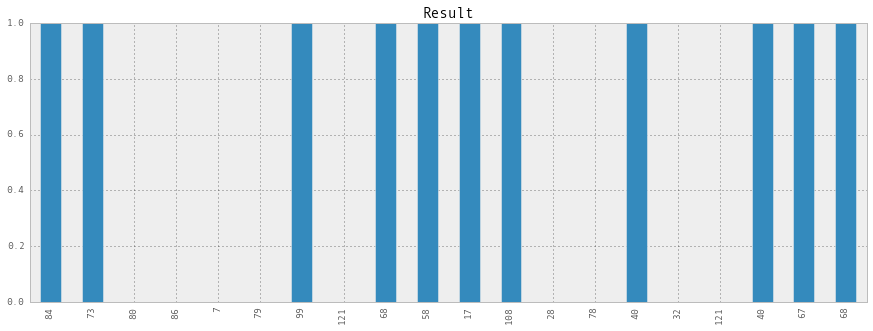

In [36]:
test_data['Result'][:20].plot(kind='bar', subplots=True, figsize=(15, 5))

To plot the predicted data we need to convert it into pandas data frame first.

In [37]:
predicted_result = pd.DataFrame(predicted_result, columns=['Predicted Result']);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb23f3a10>], dtype=object)

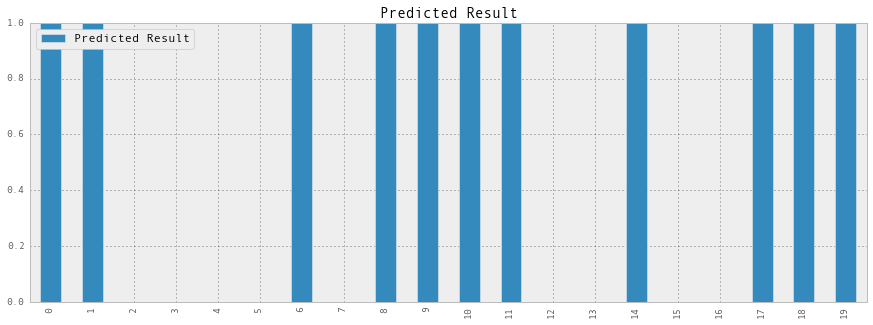

In [38]:
predicted_result[:20].plot(kind='bar', subplots=True, figsize=(15, 5))

We can see that both the graphs are exactly same.

# Now lets make another classifier which predicts how many Double Faults player one commits. 
The column which stores this data in input_data is 'DBF.1'. Since it is a continuous variable we will use linear 
regression this time. The target column will be 'DBF1' and rest of the columns will be input data for the classifier.

In [39]:
target_column = 'DBF.1';
input_data_columns = [];
for column in input_data.keys():
    if column != target_column:
        input_data_columns.append(column);

In [40]:
data_x = input_data[input_data_columns];
data_y = input_data[target_column];

In [41]:
linear_regr = linear_model.LinearRegression()

In [42]:
#Train the classifier
clf = linear_regr.fit(data_x, data_y);

In [43]:
#Test data input
test_data_x = test_data[input_data_columns];

predicted_result = clf.predict(test_data_x)

In [44]:
predicted_result

array([ 3.96797089,  6.27319166,  2.05669611,  1.46838655,  2.24870816,
        3.58739409,  2.18509419,  3.82675637,  1.22865198,  3.78253087,
        5.04871872,  3.32239786,  2.43061685,  3.69821168,  4.48045371,
        4.37727147,  3.87743109,  2.11891937,  2.94163972,  5.1413804 ,
        1.77793897,  2.77361542,  3.08471639,  7.6246385 ,  3.31536512,
        7.98118011,  3.66015819,  2.64714928,  2.46350172,  4.64543521,
        3.59607087,  3.15755659,  1.81787362,  1.47703804,  1.68465481,
        1.88491107,  2.29791313,  5.26641278,  3.66195496,  5.54356756,
        5.63156975,  2.29442705,  4.41603268,  0.81141359,  2.62938263,
        4.02310272,  5.56898454,  1.80847002,  0.97380756,  5.96096087,
        2.04550562,  3.64602079,  4.83607019,  2.04871821,  3.79377401,
        1.28143892,  4.91983509,  1.40209716,  2.40962959,  6.26242749,
        3.83298518,  2.4323595 ,  4.99692163,  5.85918788,  3.41013109,
        4.66661767,  0.60592309,  3.97032148,  4.71272211,  0.95

In [45]:
test_data['Predicted_DBF.1'] = predicted_result

In [46]:
#Lets check the actual result versus predicted result
test_data[['DBF.1', 'Predicted_DBF.1']]

,DBF.1,Predicted_DBF.1
84,5,3.967971
73,3,6.273192
80,3,2.056696
86,3,1.468387
7,1,2.248708
79,5,3.587394
99,2,2.185094
121,1,3.826756
68,0,1.228652
58,6,3.782531


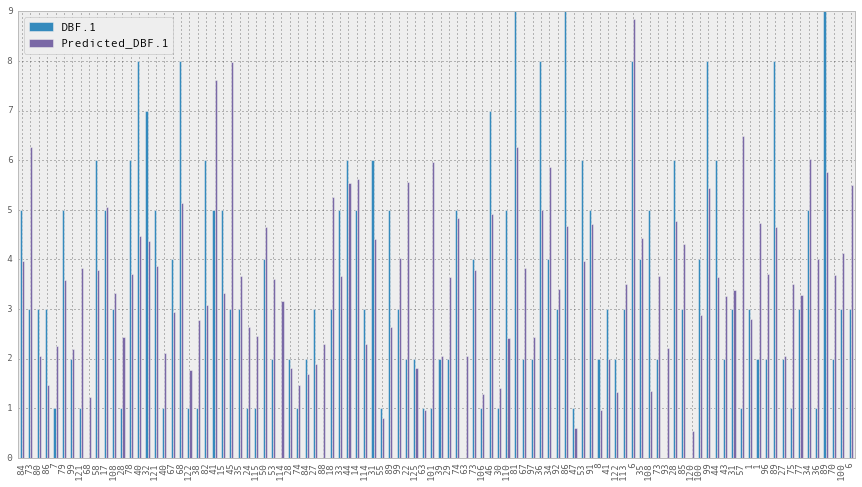

In [47]:
test_data[['DBF.1', 'Predicted_DBF.1']].plot(kind='bar', figsize=(15, 8))

In [48]:
test_data['Prediction_error'] = abs(test_data['DBF.1'] - test_data['Predicted_DBF.1'])*100/test_data['DBF.1']

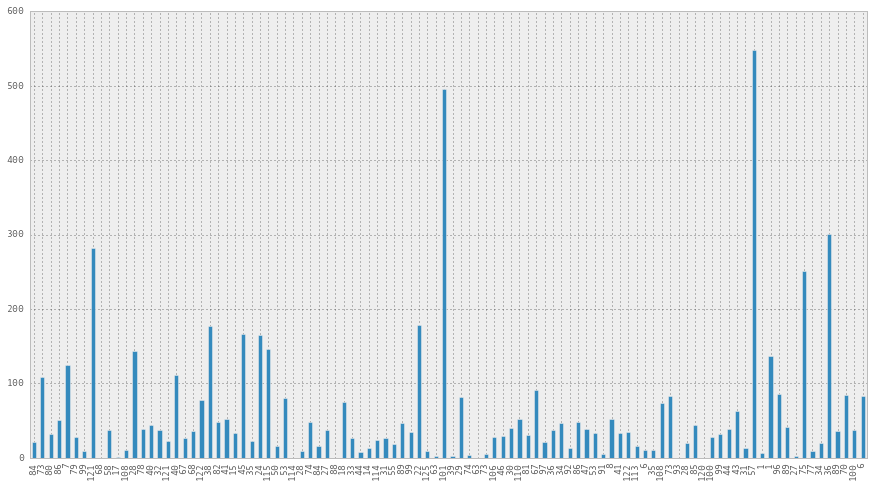

In [49]:
test_data['Prediction_error'].plot(kind='bar', figsize=(15, 8));

# Lets now predict the tournament name to which a game belongs to:

The data related to tournament name is in column 'Type'. We will predict it with Logistic regression, support vector machine and random forestal gorithms and will compare the results.

In [50]:
#Our target column is 'Type'
target_column = 'Type';
input_data_columns = [];
for column in input_data.keys():
    if column != target_column:
        input_data_columns.append(column);

Based on the target column, lets get data_x, and data_y to train the classifier

In [51]:
data_x = input_data[input_data_columns];
data_y = input_data[target_column];

In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#logistic regression classifier
logistic_clf = linear_model.LogisticRegression();
#Linear SVC classifier
svm_clf = svm.LinearSVC();
#Random forest classifier
forest_clf = RandomForestClassifier(n_estimators=160)

Lets train all the different classifiers now

In [53]:
logistic_clf.fit(data_x, data_y);

svm_clf.fit(data_x, data_y);

forest_clf.fit(data_x, data_y);

In [54]:
#Test data input
test_data_x = test_data[input_data_columns];
test_data_y = test_data[target_column];

Lets predict results for each classifier now

In [55]:
logistic_predicted_results = logistic_clf.predict(test_data_x);
svm_predicted_results = svm_clf.predict(test_data_x);
forest_predicted_results = forest_clf.predict(test_data_x);

Lets put all the results in a single data frame for easy comparision

In [56]:
results = pd.DataFrame({'Actual_Type': test_data_y.values,
                        'Logistic_Predicted_Type': logistic_predicted_results,
                        'Svm_Predicted_Type': svm_predicted_results,
                        'Forest_predicted_Type': forest_predicted_results
                       })

In [57]:
#Lets see the predicted results versus actual result
results

,Actual_Type,Forest_predicted_Type,Logistic_Predicted_Type,Svm_Predicted_Type
0,1,1,1,0
1,4,4,4,4
2,0,2,0,2
3,0,2,2,2
4,5,7,6,6
5,4,4,4,4
6,1,3,1,1
7,0,2,2,2
8,6,6,6,6
9,1,1,1,1


Number of correct predictions by Logistic regression classifier

In [58]:
#Number of correct predictions
len(results[results['Actual_Type'] == results['Logistic_Predicted_Type']])

67

Number of correct predictions by SVM classifier

In [59]:
#Number of correct predictions
len(results[results['Actual_Type'] == results['Svm_Predicted_Type']])

65

Number of correct predictions by Random forest classifier

In [60]:
#Number of correct predictions
len(results[results['Actual_Type'] == results['Forest_predicted_Type']])

70

Lets plot the first 20 results

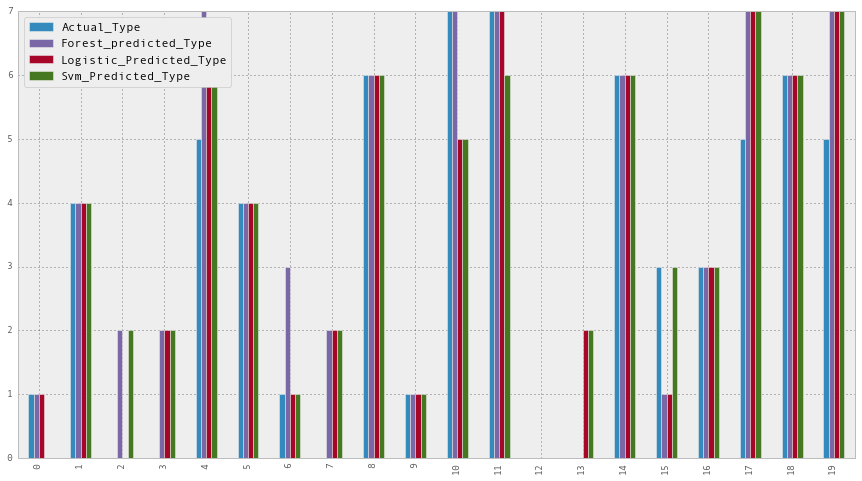

In [61]:
results[:20].plot(kind='bar', figsize=(15, 8))

# Lets try Random forest algorithm on this data with different values of number of trees, and max_features

We will make three classifiers with therr different values of "max_features". Then we will plot the out of bag errors for each classifier for different number of trees. Based of the OOB errors we will select optimum pair of [max_features, trees].

In [154]:
ensemble_clfs = [
    ("RF:max_features=sqrt",
        RandomForestClassifier(oob_score=True,
                               max_features="sqrt")),
    ("RF:max_features=log2",
        RandomForestClassifier(max_features='log2',
                               oob_score=True)),
    ("RF:max_features=None",
        RandomForestClassifier(max_features=None,
                               oob_score=True))
]

In [155]:
from collections import OrderedDict
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate['index'] = [];

In [156]:
# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 200

In [157]:
for i in range(min_estimators, max_estimators + 1):
    error_rate['index'].append(i)
    for label, clf in ensemble_clfs:
        clf.set_params(n_estimators=i)
        clf.fit(data_x, data_y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append(oob_error)
print len(error_rate['index'])
print len(error_rate['RF:max_features=sqrt'])

191
191


In [158]:
errors = pd.DataFrame({'RF:max_features=sqrt': error_rate["RF:max_features=sqrt"],
                       'RF:max_features=log2': error_rate["RF:max_features=log2"],
                       'RF:max_features=None': error_rate["RF:max_features=None"],
                       'index': error_rate["index"],
                      })
errors = errors.set_index(['index'], drop=True, append=False, inplace=False, verify_integrity=False);

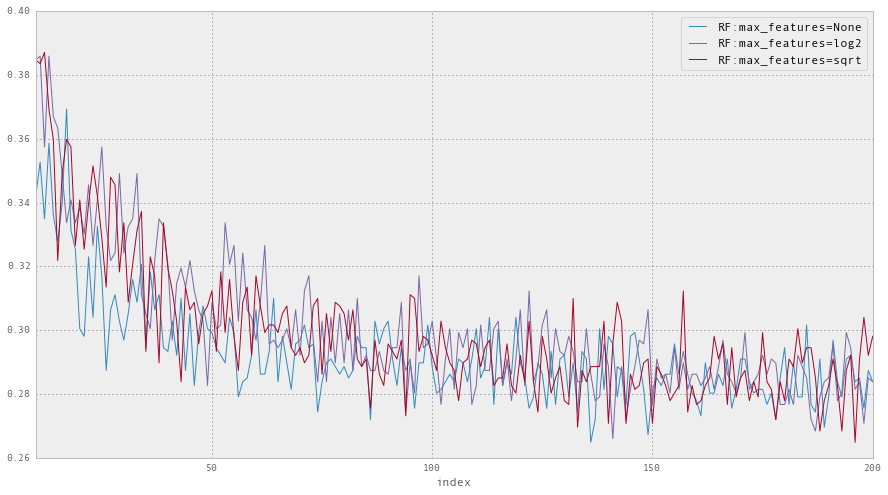

In [159]:
errors.plot(figsize=(15,8))

Lets see the minimum error for each of the classifier, and trees

In [169]:
#values of minimum errors
errors.min()

RF:max_features=None    0.264846
RF:max_features=log2    0.266033
RF:max_features=sqrt    0.264846
dtype: float64

In [172]:
#Number of trees corresponding to the minimum errors
errors.idxmin()

RF:max_features=None    136
RF:max_features=log2    141
RF:max_features=sqrt    196
dtype: int64

So we see that minimum error for "max_features=None", and "max_features=sqrt" configuration is same and 
the corresponding number of trees are 136, and 196 respectvely.

So the optimum configuration for Random forest algorithm will be [max_features=sqrt, trees=196] 
or [max_features=None, trees=136].

Lets make a classifier with this configuration and predict the result on the data.

In [180]:
forest_clf = RandomForestClassifier(max_features=None, n_estimators=136);
forest_clf.fit(data_x, data_y);

In [181]:
predicted_results = forest_clf.predict(test_data_x);

In [182]:
predicted_results

array([3, 4, 0, 2, 7, 4, 3, 0, 6, 1, 5, 7, 2, 0, 6, 1, 3, 7, 6, 7, 2, 7, 0,
       6, 7, 4, 3, 6, 2, 5, 2, 4, 7, 2, 7, 1, 6, 2, 7, 5, 5, 0, 3, 3, 3, 1,
       4, 3, 3, 2, 6, 3, 6, 6, 6, 7, 1, 3, 3, 4, 7, 1, 4, 0, 2, 1, 7, 1, 6,
       7, 4, 3, 2, 4, 7, 0, 2, 6, 1, 7, 2, 4, 0, 6, 3, 3, 4, 2, 4, 1, 4, 7,
       2, 3, 7, 1, 0, 3, 1, 6])

In [183]:
results['Forest_predicted_Type'] = predicted_results

In [184]:
results

,Actual_Type,Forest_predicted_Type,Logistic_Predicted_Type,Svm_Predicted_Type
0,1,3,1,0
1,4,4,4,4
2,0,0,0,2
3,0,2,2,2
4,5,7,6,6
5,4,4,4,4
6,1,3,1,1
7,0,0,2,2
8,6,6,6,6
9,1,1,1,1


Lets count the correct results now

In [185]:
#Number of correct predictions
len(results[results['Actual_Type'] == results['Forest_predicted_Type']])

69